In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import glob
import re

In [2]:
G = nx.read_edgelist('./WS_p0/WS_edges_p0.dat')

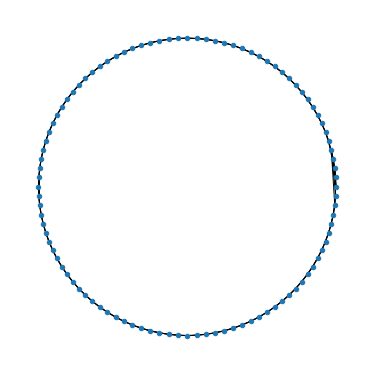

In [3]:
plt.figure(figsize = (5,5))
pos = nx.circular_layout(G)
nx.draw(G, pos = pos, node_size = 20)

In [4]:
Nv = 100
State = [np.random.choice([+1,-1], p = [0.5,0.5]) for i in range(Nv)]

In [5]:
colors = ['red' if i == 1 else 'blue' for i in State]

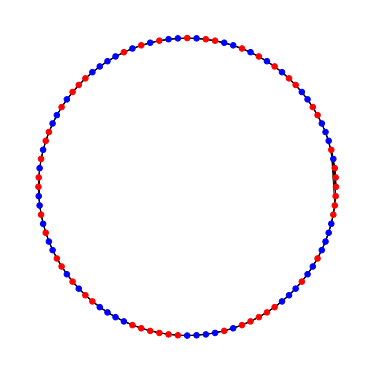

In [6]:
plt.figure(figsize = (5,5))
pos = nx.circular_layout(G)
nx.draw(G, pos = pos, node_size = 30, node_color = colors)

In [9]:
Edges = np.loadtxt('./WS_p0/WS_edges_p0.dat')
matA_spin = np.zeros([Nv,Nv])
for link in Edges:
    i = int(link[0])
    j = int(link[1])
    if State[i] == State[j]:
        matA_spin[i][j] = 1
        matA_spin[j][i] = 1

In [10]:
G_s = nx.from_numpy_matrix(matA_spin)

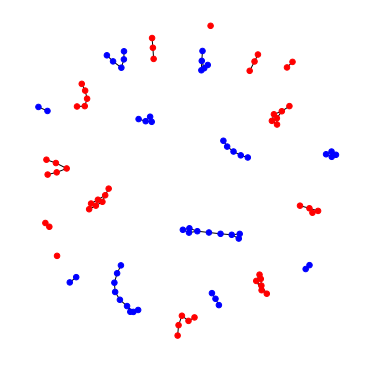

In [11]:
plt.figure(figsize = (5,5))
nx.draw(G_s,  node_size = 30, node_color = colors)

In [12]:
Components = [len(c) for c in sorted(nx.connected_components(G_s), key=len, reverse=True)]

In [13]:
lcc = Components[0]
if lcc<Nv:
    slcc = Components[1]
else:
    slcc = 0

In [14]:
print(lcc,slcc)

9 9


In [15]:
G_s_components = sorted(nx.connected_components(G_s), key=len, reverse=True)
G_s_LCC = G_s.subgraph(G_s_components[0])

In [16]:
G_s_LCC.nodes()

NodeView((33, 34, 35, 36, 24, 26, 27, 29, 31))

In [17]:
def LCC_SLCC(Edges, State):
    Nv = len(State)
    matA_spin = np.zeros([Nv,Nv])
    for link in Edges:
        i = int(link[0])
        j = int(link[1])
        if State[i] == State[j]:
            matA_spin[i][j] = 1
            matA_spin[j][i] = 1
    
    G_s = nx.from_numpy_matrix(matA_spin)
    Components = [len(c) for c in sorted(nx.connected_components(G_s), key=len, reverse=True)]
    
    lcc = Components[0]
    if lcc<Nv:
        slcc = Components[1]
    else:
        slcc = 0
    return (lcc,slcc)

In [18]:
def read_state(file,Edges):
    LCC_list = []
    SLCC_list = []
    States = np.loadtxt(file)
    for i in range(len(States)):
        State = States[i]
        lcc,slcc = LCC_SLCC(Edges, State)
        LCC_list.append(lcc)
        SLCC_list.append(slcc)
    return np.mean(LCC_list),np.mean(SLCC_list)

## WS_P0

In [34]:
temps = []
LCCs = []
SLCCs = []
for file in glob.glob('./WS_p0/Results/*.dat'):
    #print(file)
    Edges = np.loadtxt('./WS_p0/WS_edges_p0.dat')
    Nv = 100
    temps.append(float(re.findall( r'\d+.\d',file)[0]))
    mean_lcc, mean_slcc = read_state(file,Edges)
    LCCs.append(mean_lcc)
    SLCCs.append(mean_slcc)

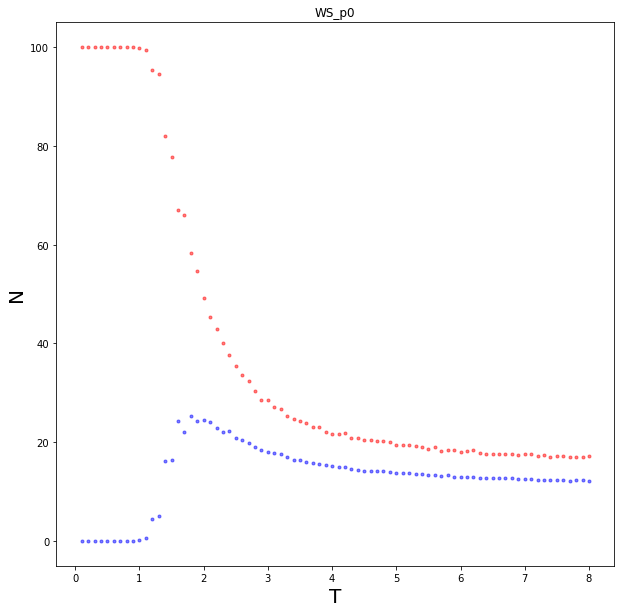

In [35]:
plt.figure(figsize = (10,10))
plt.title('WS_p0')
plt.plot(temps,LCCs,'r.', alpha = 0.5)
plt.plot(temps,SLCCs,'b.', alpha = 0.5)
plt.xlabel('T', size = 20)
plt.ylabel('N', size = 20)
plt.show()

# WS_p1

In [36]:
temps_2 = []
LCCs_2 = []
SLCCs_2 = []
for file in glob.glob('./WS_p0.1/Results/*.dat'):
    #print(file)
    Edges = np.loadtxt('./WS_p0.1/WS_edgesp_0.1.dat')
    Nv = 100
    temps_2.append(float(re.findall( r'\d+.\d',file)[1]))
    mean_lcc, mean_slcc = read_state(file,Edges)
    LCCs_2.append(mean_lcc)
    SLCCs_2.append(mean_slcc)

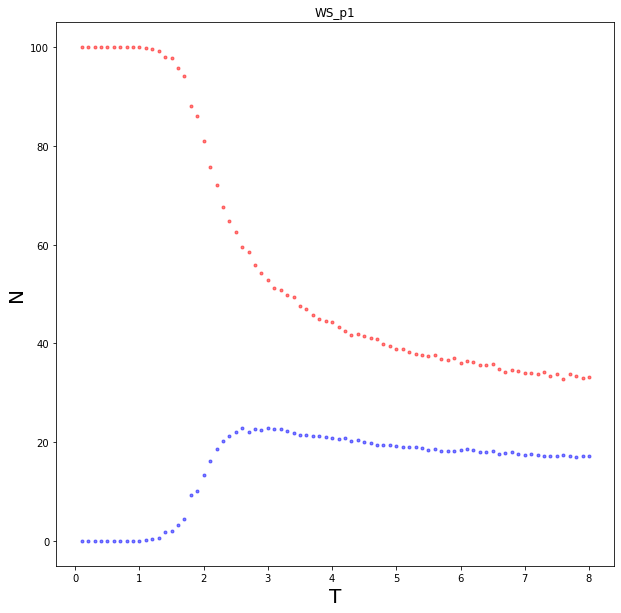

In [44]:
plt.figure(figsize = (10,10))
plt.title('WS_p1')
plt.plot(temps_2,LCCs_2,'r.', alpha = 0.5)
plt.plot(temps_2,SLCCs_2,'b.', alpha = 0.5)
plt.xlabel('T', size = 20)
plt.ylabel('N', size = 20)
plt.show()

# ERperL

In [45]:
temps_3 = []
LCCs_3 = []
SLCCs_3 = []
for file in glob.glob('./ERperL/Results/*.dat'):
    #print(file)
    Edges = np.loadtxt('./ERperL/ER_edges.dat')
    Nv = 100
    temps_3.append(float(re.findall( r'\d+.\d',file)[0]))
    mean_lcc, mean_slcc = read_state(file,Edges)
    LCCs_3.append(mean_lcc)
    SLCCs_3.append(mean_slcc)

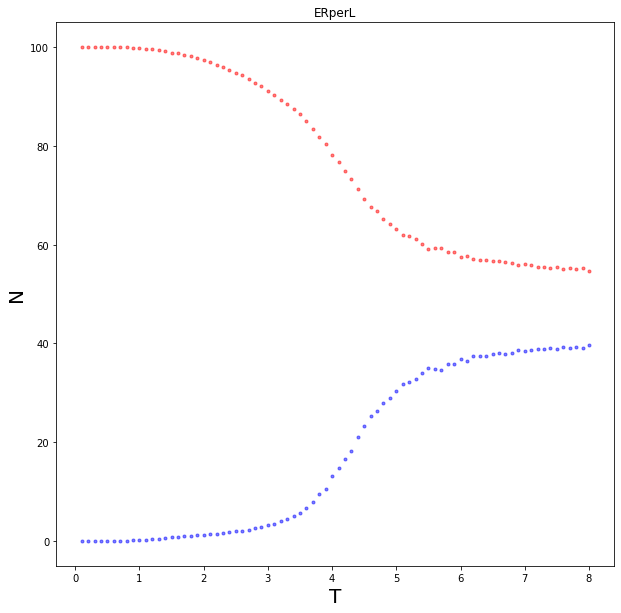

In [46]:
plt.figure(figsize = (10,10))
plt.title('ERperL')
plt.plot(temps_3,LCCs_3,'r.', alpha = 0.5)
plt.plot(temps_3,SLCCs_3,'b.', alpha = 0.5)
plt.xlabel('T', size = 20)
plt.ylabel('N', size = 20)
plt.show()

# BAm2

In [54]:
temps_4 = []
LCCs_4 = []
SLCCs_4 = []
for file in glob.glob('./BAm2/Results/*.dat'):
    #print(file)
    Edges = np.loadtxt('./BAm2/BA_edges_m2.dat')
    Nv = 100
    temps_4.append(float(re.findall( r'\d+.\d',file)[0]))
    mean_lcc, mean_slcc = read_state(file,Edges)
    LCCs_4.append(mean_lcc)
    SLCCs_4.append(mean_slcc)

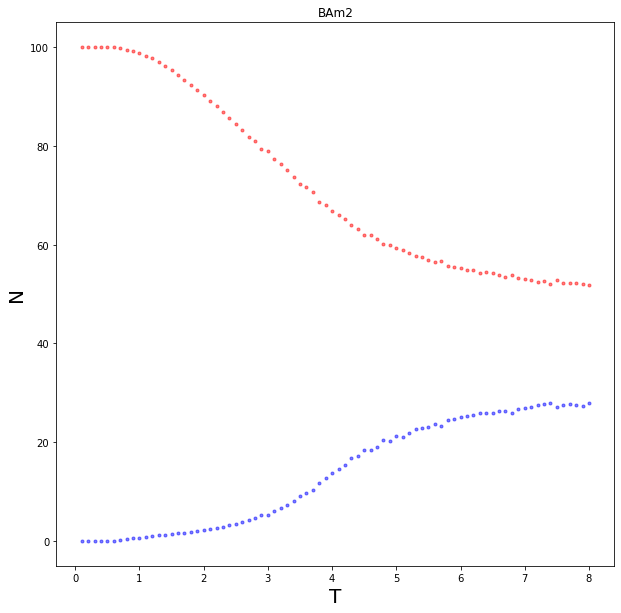

In [55]:
plt.figure(figsize = (10,10))
plt.title('BAm2')
plt.plot(temps_4,LCCs_4,'r.', alpha = 0.5)
plt.plot(temps_4,SLCCs_4,'b.', alpha = 0.5)
plt.xlabel('T', size = 20)
plt.ylabel('N', size = 20)
plt.show()

# BAm1

In [60]:
temps_5 = []
LCCs_5 = []
SLCCs_5 = []
for file in glob.glob('./BAm1/Results/*.dat'):
    #print(file)
    Edges = np.loadtxt('./BAm1/BA_edges_m1.dat')
    Nv = 100
    temps_5.append(float(re.findall( r'\d+.\d',file)[0]))
    mean_lcc, mean_slcc = read_state(file,Edges)
    LCCs_5.append(mean_lcc)
    SLCCs_5.append(mean_slcc)

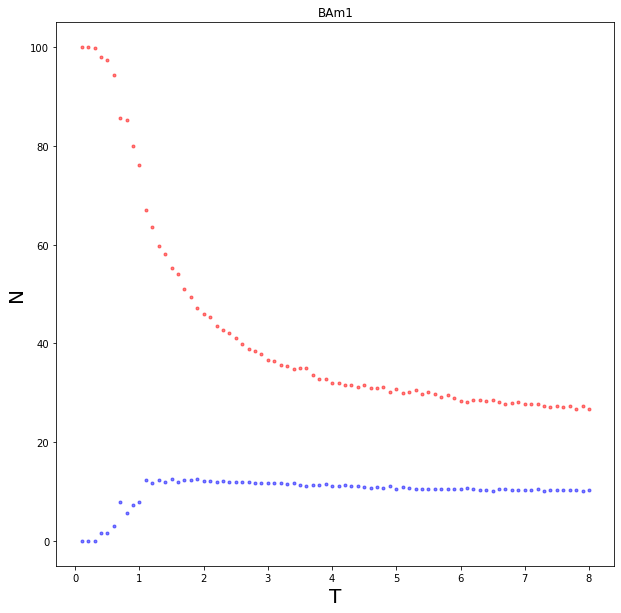

In [61]:
plt.figure(figsize = (10,10))
plt.title('BAm1')
plt.plot(temps_5,LCCs_5,'r.', alpha = 0.5)
plt.plot(temps_5,SLCCs_5,'b.', alpha = 0.5)
plt.xlabel('T', size = 20)
plt.ylabel('N', size = 20)
plt.show()

# Graficas conjuntas

In [62]:
colors = ['r','g','b','m','c']
labels = ['WS_p0','WS_p0.1',"ERperL", 'BAm2','BAm1']
LCC_S = [LCCs,LCCs_2,LCCs_3,LCCs_4,LCCs_5]
SLCC_S = [SLCCs,SLCCs_2,SLCCs_3,SLCCs_4,SLCCs_5]
temps_S = [temps,temps_2,temps_3,temps_4,temps_5]

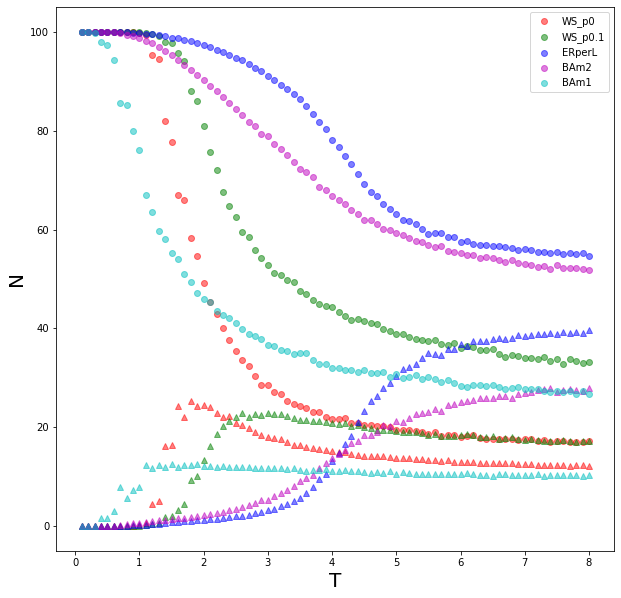

In [63]:
plt.figure(figsize = (10,10))

for i in range(len(temps_S)):
    
    plt.plot(temps_S[i],LCC_S[i],colors[i] + 'o', alpha = 0.5, label = labels[i])
    plt.plot(temps_S[i],SLCC_S[i],colors[i] + '^', alpha = 0.5)

    
plt.xlabel('T', size = 20)
plt.ylabel('N', size = 20)
plt.legend()
plt.show()

In [72]:
re.findall( r'\d+.\d','./WS_p0/Results/T_6.4.dat',)

['6.4']

In [45]:
LCC_list = []
SLCC_list = []

Nv = 100
Edges = np.loadtxt('./WS_p0/WS_edges_p0.dat')
for i in range(1000):
    State = [np.random.choice([+1,-1], p = [0.5,0.5]) for i in range(Nv)]
    lcc,slcc = LCC_SLCC(Edges, State)
    LCC_list.append(lcc)
    SLCC_list.append(slcc)

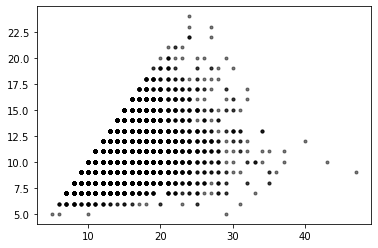

In [50]:
plt.plot(LCC_list,SLCC_list,'k.', alpha = 0.5)
plt.show()

In [48]:
np.mean(LCC_list)

14.091

In [49]:
np.mean(SLCC_list)

10.4688